In [1]:
# Import libraries
import pandas as pd
import numpy as np
from nixtlats import TimeGPT
import os
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
import hvplot.pandas
import yfinance as yf
import datetime

In [2]:
drop_cols = ['Volume', 'Dividends', 'Stock Splits', 'Capital Gains']

In [3]:
def get_history(ticker):
    tckr_name = yf.Ticker(ticker)
    tckr_df = tckr_name.history(period = '10y')
    tckr_df = tckr_df.drop(columns= drop_cols)
    tckr_df = tckr_df.dropna()
    tckr_df.index = tckr_df.index.date
    tckr_df.index.rename('Date', inplace = True)
    tckr_df.reset_index(inplace=True)
    return tckr_df

In [4]:
ticker = input(str('What Mutual Fund Would you like?'))

What Mutual Fund Would you like? VTSAX


In [5]:
get_history(ticker)

,Date,Open,High,Low,Close
0,2014-04-04,39.729549,39.729549,39.729549,39.729549
1,2014-04-07,39.249447,39.249447,39.249447,39.249447
2,2014-04-08,39.434750,39.434750,39.434750,39.434750
3,2014-04-09,39.897987,39.897987,39.897987,39.897987
4,2014-04-10,39.022045,39.022045,39.022045,39.022045
...,...,...,...,...,...
2510,2024-03-26,125.230003,125.230003,125.230003,125.230003
2511,2024-03-27,126.430000,126.430000,126.430000,126.430000
2512,2024-03-28,126.599998,126.599998,126.599998,126.599998
2513,2024-04-01,126.239998,126.239998,126.239998,126.239998


In [14]:
ticker_df = get_history(ticker)

In [7]:
#tckr_df

In [6]:
# Validating existence of .env file
find_dotenv()

'C:\\Users\\Mike\\OneDrive\\FinTech-Bootcamp\\.env'

In [7]:
# Loading .env environment variables
load_dotenv()

True

In [8]:
# Setting variable for TimeGPT_Token
TimeGPT_Token = os.getenv("TIMEGPT_TOKEN")

In [9]:
# Instantiating TimeGPT Model
timegpt = TimeGPT(token = TimeGPT_Token)
# Validating TimeGPT token
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [19]:
fcst_df = timegpt.forecast(df = ticker_df, 
                               time_col = 'Date', 
                               target_col = 'Close',  
                               h=24,
                               freq = "MS", 
                               fewshot_steps = 10, 
                               fewshot_loss = 'mse',
                               model='long-horizon'
                               )
pred_df = pd.concat([ticker_df,fcst_df], axis = 0, join = 'outer')
pred_df['Close'].fillna(pred_df['TimeGPT'], inplace= True)
pred_df.reset_index(inplace = True)
pred_df.drop(columns='index', inplace = True)
pred_df

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,Date,Open,High,Low,Close,TimeGPT
0,2014-04-07,39.249454,39.249454,39.249454,39.249454,NaN
1,2014-04-08,39.434742,39.434742,39.434742,39.434742,NaN
2,2014-04-09,39.897999,39.897999,39.897999,39.897999,NaN
3,2014-04-10,39.022045,39.022045,39.022045,39.022045,NaN
4,2014-04-11,38.626179,38.626179,38.626179,38.626179,NaN
...,...,...,...,...,...,...
2534,2025-12-01,NaN,NaN,NaN,147.859589,147.859589
2535,2026-01-01,NaN,NaN,NaN,147.675262,147.675262
2536,2026-02-01,NaN,NaN,NaN,148.986389,148.986389
2537,2026-03-01,NaN,NaN,NaN,150.486542,150.486542


In [29]:
fcst_df.head()

,Date,TimeGPT
0,2024-04-03,124.967674
1,2024-04-04,125.708588
2,2024-04-05,125.701813
3,2024-04-08,125.133499
4,2024-04-09,124.125542


In [37]:
tckr_df[270:280]

,Date,Open,High,Low,Close
270,2020-04-29,67.933083,67.933083,67.933083,67.933083
271,2020-04-30,67.120872,67.120872,67.120872,67.120872
272,2020-05-01,65.156433,65.156433,65.156433,65.156433
273,2020-05-04,65.458664,65.458664,65.458664,65.458664
274,2020-05-05,66.082001,66.082001,66.082001,66.082001
275,2020-05-06,65.656998,65.656998,65.656998,65.656998
276,2020-05-07,66.535316,66.535316,66.535316,66.535316
277,2020-05-08,67.800880,67.800880,67.800880,67.800880
278,2020-05-11,67.781975,67.781975,67.781975,67.781975
279,2020-05-12,66.308662,66.308662,66.308662,66.308662


In [12]:
tckr_df

,Date,Open,High,Low,Close
0,2014-04-04,39.729549,39.729549,39.729549,39.729549
1,2014-04-07,39.249447,39.249447,39.249447,39.249447
2,2014-04-08,39.434750,39.434750,39.434750,39.434750
3,2014-04-09,39.897987,39.897987,39.897987,39.897987
4,2014-04-10,39.022045,39.022045,39.022045,39.022045
...,...,...,...,...,...
2510,2024-03-26,125.230003,125.230003,125.230003,125.230003
2511,2024-03-27,126.430000,126.430000,126.430000,126.430000
2512,2024-03-28,126.599998,126.599998,126.599998,126.599998
2513,2024-04-01,126.239998,126.239998,126.239998,126.239998


In [41]:
fcst_df.head()

,Date,TimeGPT
0,2024-05-01,131.035477
1,2024-06-01,133.680923
2,2024-07-01,137.431137
3,2024-08-01,138.125702
4,2024-09-01,138.334930


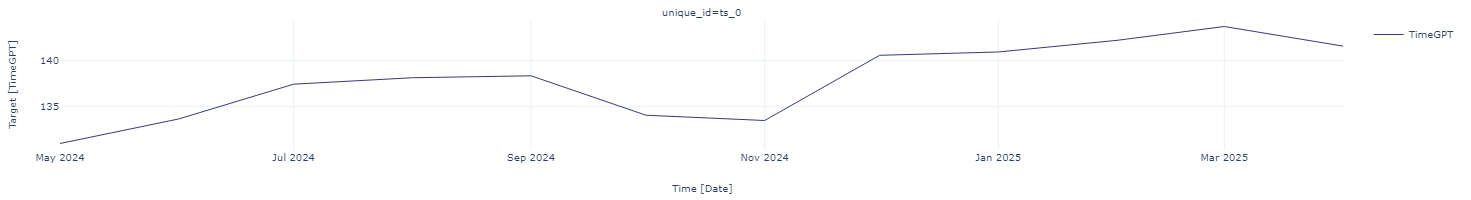

In [42]:
timegpt.plot(fcst_df, time_col='Date', target_col='TimeGPT', engine='plotly')

In [43]:
fig = fcst_df.hvplot(x='Date')
fig

:Curve   [Date]   (TimeGPT)

In [44]:
pred_df = pd.concat([tckr_df,fcst_df], axis = 0, join = 'outer')

In [45]:
pred_df

,Date,Open,High,Low,Close,TimeGPT
0,2014-04-04,39.729549,39.729549,39.729549,39.729549,NaN
1,2014-04-07,39.249447,39.249447,39.249447,39.249447,NaN
2,2014-04-08,39.434750,39.434750,39.434750,39.434750,NaN
3,2014-04-09,39.897987,39.897987,39.897987,39.897987,NaN
4,2014-04-10,39.022045,39.022045,39.022045,39.022045,NaN
...,...,...,...,...,...,...
7,2024-12-01,NaN,NaN,NaN,NaN,140.543839
8,2025-01-01,NaN,NaN,NaN,NaN,140.902527
9,2025-02-01,NaN,NaN,NaN,NaN,142.158295
10,2025-03-01,NaN,NaN,NaN,NaN,143.649612


In [46]:
pred_df['Close Price'].fillna(pred_df['TimeGPT'], inplace= True)
pred_df

,Date,Open,High,Low,Close,TimeGPT
0,2014-04-04,39.729549,39.729549,39.729549,39.729549,NaN
1,2014-04-07,39.249447,39.249447,39.249447,39.249447,NaN
2,2014-04-08,39.434750,39.434750,39.434750,39.434750,NaN
3,2014-04-09,39.897987,39.897987,39.897987,39.897987,NaN
4,2014-04-10,39.022045,39.022045,39.022045,39.022045,NaN
...,...,...,...,...,...,...
7,2024-12-01,NaN,NaN,NaN,140.543839,140.543839
8,2025-01-01,NaN,NaN,NaN,140.902527,140.902527
9,2025-02-01,NaN,NaN,NaN,142.158295,142.158295
10,2025-03-01,NaN,NaN,NaN,143.649612,143.649612


<Axes: xlabel='Date'>

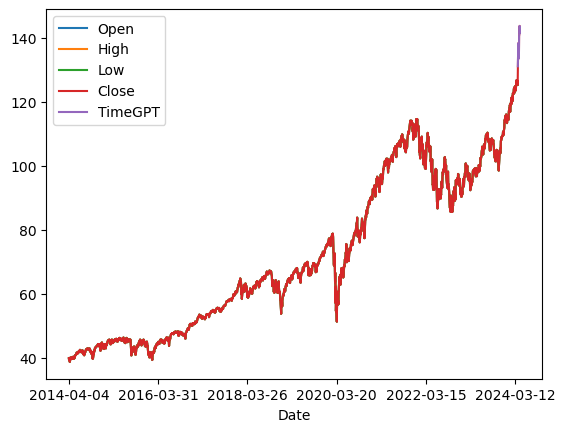

In [47]:
pred_plot = pred_df.plot(x = 'Date')
pred_plot

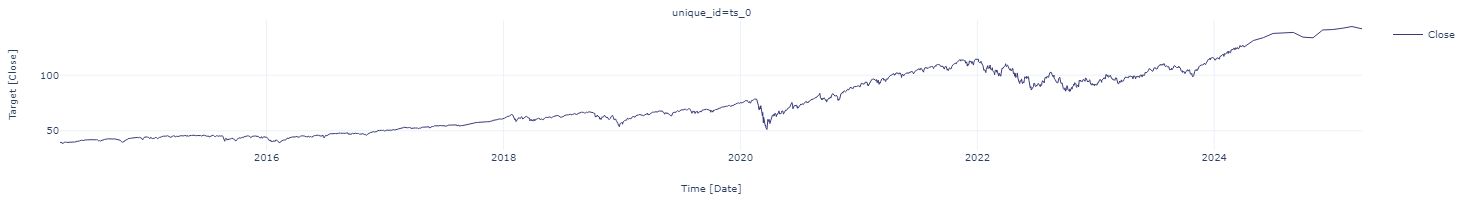

In [48]:
timegpt.plot(pred_df, time_col='Date', target_col='Close', engine='plotly')